In [1]:
import matplotlib.pyplot as plt
import shapely
from stackstac import mosaic

from sentinel2_wrappers.pystac import catalogue_search, data_fetch
from sentinel2_wrappers.utils import constants

###  1. define an Area of interest (AOI)

In [ ]:
# a very simple a
km2deg = 1.0 / 111
y, x = 36.740333, -2.734333 # Almeria
# x, y = (113.887, -25.843)  # Center point of a query, Madagascar
dx = 20 #km
dy = 20
rx = dx * km2deg
ry = dy*km2deg
bbox = (x - rx, y - ry, x + rx, y + ry)
bbox_km = (x-dx, y-dy, x+dx, y+dy)


### 2. search catalogues

In [ ]:
query_res = catalogue_search.search_catalogue(bbox, catalogue = constants.CATALOGUES[constants.AWS_EARTH_SEARCH_v1], collections = ['sentinel-2-l2a'])
gdf = catalogue_search.parse_results(query_res)

##. 3 Download single granule result that best covers AOI

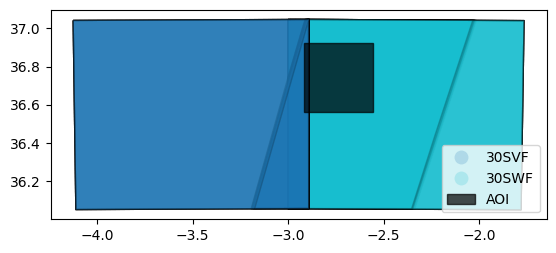

In [ ]:
# visualise the granules 
fig, ax = plt.subplots(1,1)
gdf.plot("granule",
    edgecolor="black",
    categorical=True,
    aspect="equal",
    alpha=0.2,
    figsize=(6, 12),
    # cmap = 'plasma',
    legend=True,
    legend_kwds={"loc": "upper left", "frameon": False, "ncol": 1},
    ax = ax
)
l = ax.get_legend()
texts, handles = l.texts, l.legend_handles
labels = [t.get_text() for t in texts]

box_xs, box_ys = shapely.geometry.box(*bbox).exterior.xy
polygon = ax.fill( box_xs, box_ys, alpha = 0.7, c = 'k', label = 'AOI')

handles.append(polygon[0])
labels.append('AOI')

ax.legend(handles, labels, loc = 'lower right')


In [ ]:

# vis = data_fetch.download_top_result(gdf, query = q, band = 'visual')


In [ ]:
# plt.imshow(vis.values[0,::5,::5])
# plt.colorbar()

In [ ]:
# # https://github.com/python-visualization/folium/issues/1501
# # fig = Figure(width="400px", height="500px")
# map1 = folium.Map()
# # fig.add_child(map1)

# folium.GeoJson(
#     shapely.geometry.box(*bbox),
#     style_function=lambda x: dict(fill=False, weight=1, opacity=0.7, color="olive"),
#     name="Query",
# ).add_to(map1)

# print('exploring')
# m2 = gdf.explore(
#     "granule",
#     categorical=True,
#     tooltip=[
#         "granule",
#         "datetime",
#         "s2:nodata_pixel_percentage",
#         "eo:cloud_cover",
#     ],
#     popup=True,
#     style_kwds=dict(fillOpacity=0.1, width=2),
#     name="STAC",
#     m=map1,
# )

# map1.fit_bounds(bounds=utils.gridding.convert_bounds(gdf.unary_union.bounds))
# # display(fig)
# m2

# get stacked data RGB

In [ ]:
granules_list = catalogue_search.get_granule_list(gdf, query=q)

In [ ]:
collated_data = data_fetch.fetch_aoi_data(granules_list, q, ['red','green','blue'], resolution = 10, limit_to_bbox=True)
collated_data

/Users/Ivan/Documents/python/sat-data/.venv/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


<xarray.DataArray 'stackstac-aa07e4144dfb2ba678a9ded190a23654' (time: 1,
                                                                band: 3,
                                                                y: 4007, x: 3229)> Size: 311MB
dask.array<where, shape=(1, 3, 4007, 3229), dtype=float64, chunksize=(1, 1, 4007, 3229), chunktype=numpy.ndarray>
Coordinates: (12/54)
  * time                                     (time) datetime64[ns] 8B 2021-09...
    id                                       (time) <U24 96B 'S2B_30SWF_20210...
  * band                                     (band) <U5 60B 'red' 'green' 'blue'
  * x                                        (x) float64 26kB 5.076e+05 ... 5...
  * y                                        (y) float64 32kB 4.086e+06 ... 4...
    grid:code                                <U10 40B 'MGRS-30SWF'
    ...                                       ...
    proj:shape                               object 8B {10980}
    title                                    (band) <U20 240B 'Red (band 4) -...
    common_name                              (band) <U5 60B 'red' 'green' 'blue'
    center_wavelength                        (band) float64 24B 0.665 0.56 0.49
    full_width_half_max                      (band) float64 24B 0.038 ... 0.098
    epsg                                     int64 8B 32630
Attributes:
    spec:        RasterSpec(epsg=32630, bounds=(507610, 4046080, 539900, 4086...
    crs:         epsg:32630
    transform:   | 10.00, 0.00, 507610.00|\n| 0.00,-10.00, 4086150.00|\n| 0.0...
    resolution:  10

In [ ]:
rgb = collated_data.sel(band=["red", "green", "blue"])


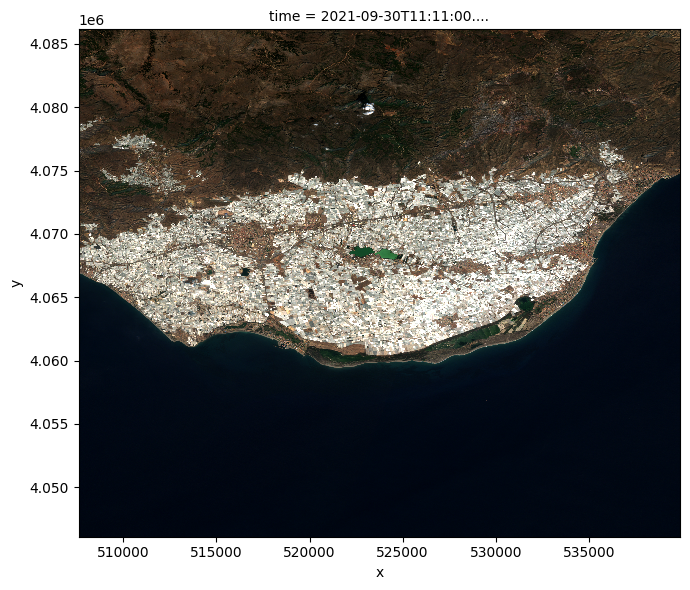

In [ ]:
collated_data.plot.imshow(row = 'time', rgb="band", robust=True, size=6)

In [ ]:
# res=collated_data.resolution
# proj = stackstac.raster_spec.RasterSpec( 'EPSG:4386', resolutions_xy = (res,res), bounds = collated_data.spec.bounds)
# collated_data = stackstac.reproject_array(collated_data, proj)  
# box_poly = shapely.geometry.box(*bbox)
# aoi_json = shapely.to_geojson(x)
# aoi_json

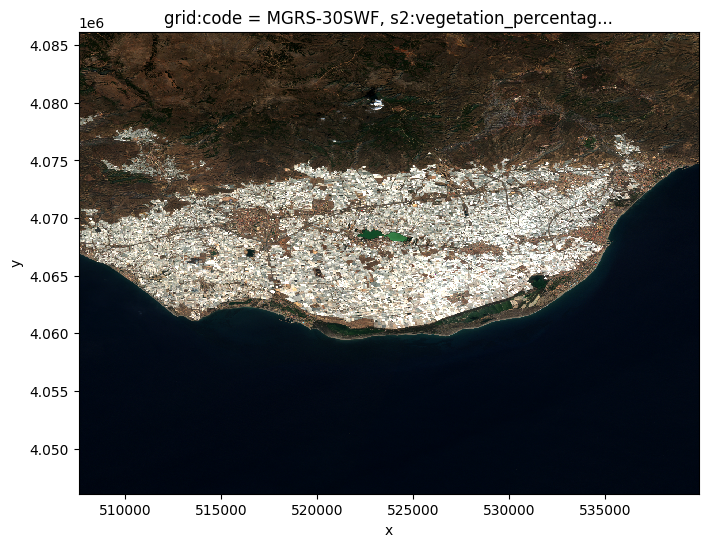

In [ ]:
mosaic_data = mosaic(rgb, dim = 'time')
mosaic_data.plot.imshow(rgb="band", robust=True, size=6)

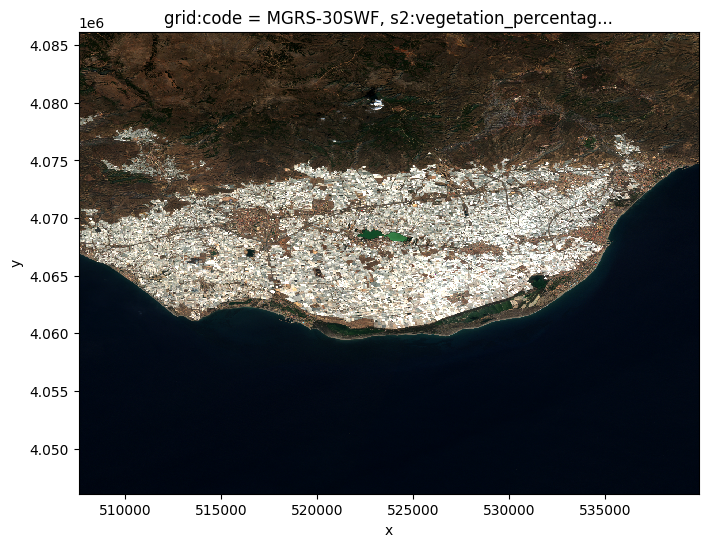

In [ ]:
median = collated_data.median(dim="time").compute()
median.plot.imshow(rgb="band", robust=True, size=6)